<a href="https://colab.research.google.com/github/syejin2004/deep-learning/blob/main/inclass/deep_learning_0508.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://drive.google.com/drive/folders/1au-YisCBRDR6IEzAGCXyrATHxl1Aw1f3

In [4]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
import os
import PIL
import shutil

base_dir = './OX_images/'
train_dir = os.path.join(base_dir, 'train')
vaildation_dir = os.path.join(base_dir, 'vaildation')
test_dir = os.path.join(base_dir, 'test')

train_o_dir = os.path.join(train_dir, 'O')
train_x_dir = os.path.join(train_dir, 'X')
print(train_o_dir, train_x_dir)

vaildation_o_dir = os.path.join(vaildation_dir, 'O')
vaildation_x_dir = os.path.join(vaildation_dir, 'X')
print(vaildation_o_dir, vaildation_x_dir)

test_o_dir = os.path.join(test_dir, 'O')
test_x_dir = os.path.join(test_dir, 'X')
print(test_o_dir, test_x_dir)

./OX_images/train/O ./OX_images/train/X
./OX_images/vaildation/O ./OX_images/vaildation/X
./OX_images/test/O ./OX_images/test/X


In [6]:
train_o_fnames = os.listdir(train_o_dir)
train_x_fnames = os.listdir(train_x_dir)
print(train_o_fnames)
print(train_x_fnames)

['20223618-O1.png', '20220371 6.png', '20232502._3.png', '20231563_o5.png', '20232882-o2.png', '20223618-O3.png', '20231576O8.png', '20223618-O18.png', '20231575_O_05.png', '20231559.o10.png', '20231559.o1.png', '20223618-O17.png', '20231567_O5.png', '55-3-o.png', '20221667-2.png', '2023156510.png', '20210829-O3.png', '20232505_o1.png', '20221667-3.png', '20220371 8.png', '20231559.o6.png', '202315658.png', '20223618-O8.png', '202315657.png', '202315655.png', '20232877-9.png', '1562_o1.png', '20210829-O6.png', '202315656.png', '20223618-O5.png', '20232877-5.png', '20232882-o6.png', '원1.png', '20223618-O14.png', '20232882-o9.png', '1562_o9.png', '1573_6.png', '20232882-o7.png', '20232877-7.png', '55-4-o.png', '20223618-O10.png', '20210829-O7.png', '1562_o5.png', '20232882-o8.png', '20232502_6.png', '20223618-O9.png', '20232505_o2.png', '1562_o2.png', '20231576O4.png', '202315654.png', '20232502._4.png', '202315652.png', '20231576O10.png', '20231567_O3.png', '20232882-o1.png', '20231568O

In [7]:
print('Total training o images :', len(os.listdir(train_o_dir)))
print('Total training x images :', len(os.listdir(train_x_dir)))

print('Total vaildation o images :', len(os.listdir(vaildation_o_dir)))
print('Total vaildation x images :', len(os.listdir(vaildation_x_dir)))

print('Total test o images :', len(os.listdir(test_o_dir)))
print('Total test x images :', len(os.listdir(test_x_dir)))

Total training o images : 140
Total training x images : 140
Total vaildation o images : 20
Total vaildation x images : 20
Total test o images : 20
Total test x images : 20


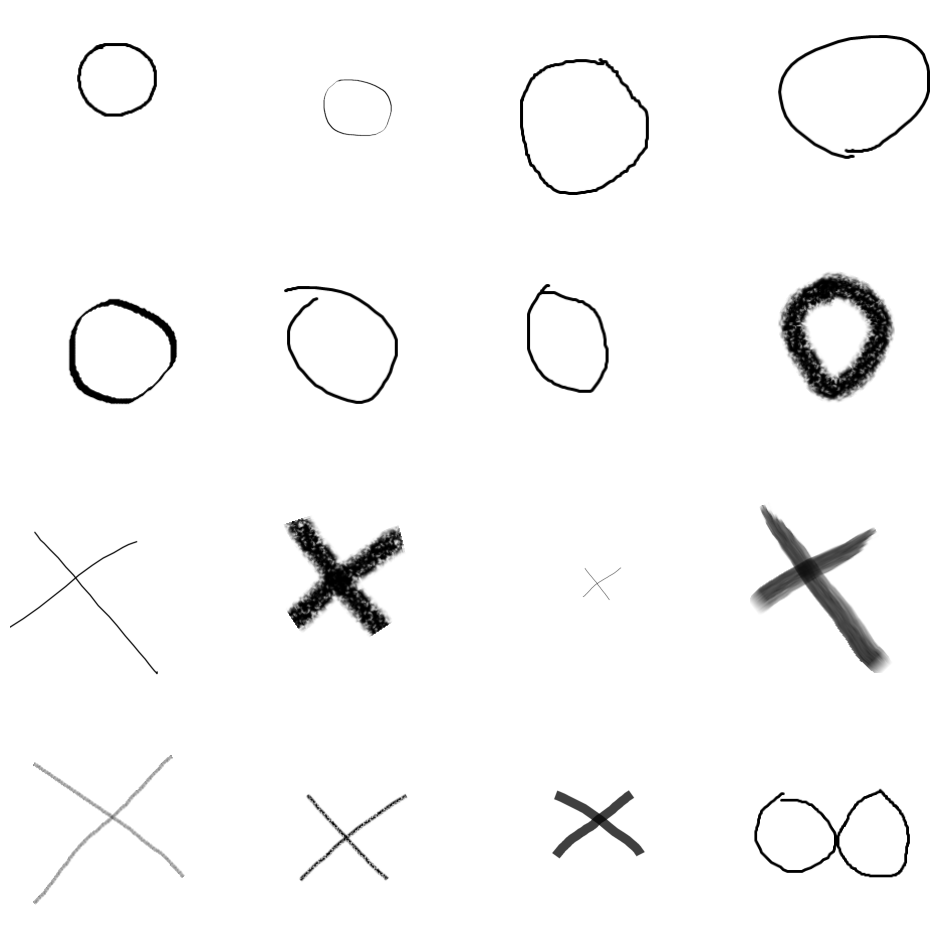

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index += 8

next_o_pix = [os.path.join(train_o_dir, fname) for fname in train_o_fnames[pic_index-8:pic_index]]
next_x_pix = [os.path.join(train_x_dir, fname) for fname in train_x_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_o_pix+next_x_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('OFF')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [23]:
import os

folder_path = './OX_images/vaildation/.ipynb_checkpoints'

if os.path.exists(folder_path):
  shutil.rmtree(folder_path)
  print("Folder deleted successfully.")
else:
  print("Folder not found.")

folder_path = './OX_images/train/.ipynb_checkpoints'

if os.path.exists(folder_path):
  shutil.rmtree(folder_path)
  print("Folder deleted successfully.")
else:
  print("Folder not found.")

folder_path = './OX_images/test/.ipynb_checkpoints'

if os.path.exists(folder_path):
  shutil.rmtree(folder_path)
  print("Folder deleted successfully.")
else:
  print("Folder not found.")

Folder deleted successfully.
Folder not found.
Folder not found.


In [24]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=25,
                                   width_shift_range=0.05,
                                   height_shift_range=0.05,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

vaildation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=16,
                                                    color_mode='grayscale',
                                                    class_mode='binary',
                                                    target_size=(150, 150))

vaildation_genertor = vaildation_datagen.flow_from_directory(vaildation_dir,
                                                    batch_size=4,
                                                    color_mode='grayscale',
                                                    class_mode='binary',
                                                    target_size=(150, 150))

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    batch_size=4,
                                                    color_mode='grayscale',
                                                    class_mode='binary',
                                                    target_size=(150, 150))

Found 280 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [25]:
train_generator.class_indices

{'O': 0, 'X': 1}

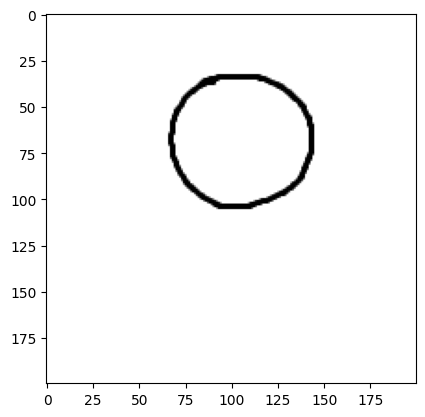

In [26]:
sample_img = mpimg.imread(next_o_pix[0])
plt.imshow(sample_img)
plt.show()

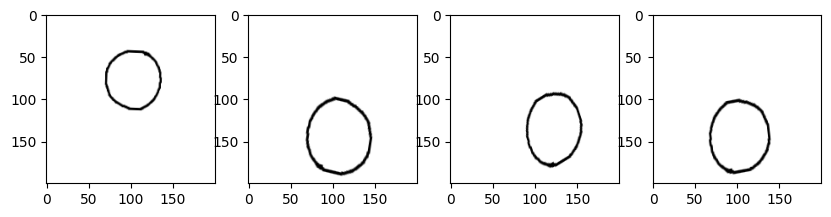

In [27]:
max_iter = 4
cnt = 1
sample_img2 = sample_img[np.newaxis, ...]

plt.figure(figsize=(10, 10))
for img in train_datagen.flow(sample_img2):
  plt.subplot(1, max_iter, cnt)
  plt.imshow(image.array_to_img(img[0]))
  if cnt == max_iter:
    break
  cnt += 1

In [30]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 32)       

In [31]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다
                              validation_data=vaildation_genertor, # validatino_generator안에도 검증용 X,y데이터들이 다 있으니 generator로 주면 됨
                              steps_per_epoch=4, # 한 번의 에포크(epoch)에서 훈련에 사용할 배치(batch)의 개수 지정; generator를 4번 부르겠다
                              epochs=100, # 데이터셋을 한 번 훈련하는 과정; epoch은 100 이상은 줘야한다
                              validation_steps=4, # 한 번의 에포크가 끝날 때, 검증에 사용되는 배치(batch)의 개수를 지정;
                                                  # validation_generator를 4번 불러서 나온 이미지들로 작업을 해라
                              verbose=2)

<ipython-input-36-52123f1b7720>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다


Epoch 1/100
4/4 - 4s - loss: 1.0871 - accuracy: 0.5000 - val_loss: 0.7181 - val_accuracy: 0.3750 - 4s/epoch - 1s/step
Epoch 2/100
4/4 - 2s - loss: 0.6971 - accuracy: 0.4844 - val_loss: 0.6762 - val_accuracy: 0.5000 - 2s/epoch - 381ms/step
Epoch 3/100
4/4 - 2s - loss: 0.6806 - accuracy: 0.5781 - val_loss: 0.7169 - val_accuracy: 0.3750 - 2s/epoch - 402ms/step
Epoch 4/100
4/4 - 2s - loss: 0.7516 - accuracy: 0.4219 - val_loss: 0.6545 - val_accuracy: 0.6875 - 2s/epoch - 384ms/step
Epoch 5/100
4/4 - 2s - loss: 0.6530 - accuracy: 0.7188 - val_loss: 0.6607 - val_accuracy: 0.5000 - 2s/epoch - 384ms/step
Epoch 6/100
4/4 - 3s - loss: 0.6140 - accuracy: 0.5781 - val_loss: 0.4738 - val_accuracy: 0.6250 - 3s/epoch - 660ms/step
Epoch 7/100
4/4 - 1s - loss: 0.5948 - accuracy: 0.5938 - val_loss: 0.3487 - val_accuracy: 0.9375 - 1s/epoch - 374ms/step
Epoch 8/100
4/4 - 1s - loss: 0.5564 - accuracy: 0.7500 - val_loss: 0.4856 - val_accuracy: 0.6875 - 1s/epoch - 357ms/step
Epoch 9/100
4/4 - 2s - loss: 0.4411

In [37]:
model.evaluate(train_generator)

18/18 [==============================] - 3s 157ms/step - loss: 0.0602 - accuracy: 0.9821


[0.060173939913511276, 0.9821428656578064]

In [40]:
model.evaluate(vaildation_genertor)

10/10 [==============================] - 0s 27ms/step - loss: 0.0361 - accuracy: 0.9750


[0.03607707470655441, 0.9750000238418579]

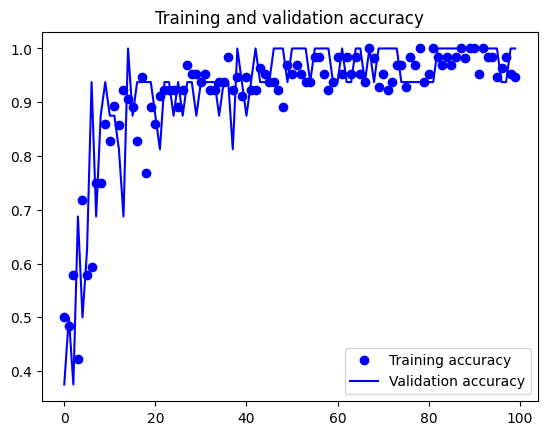

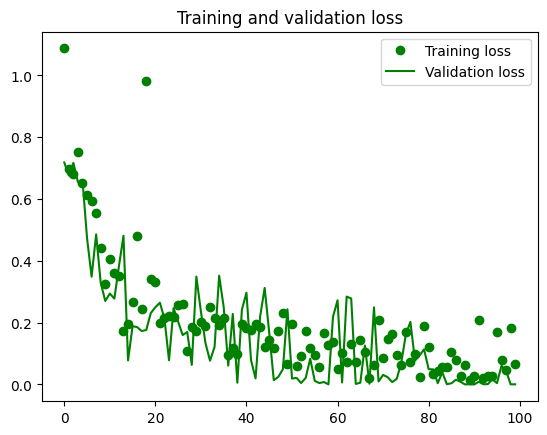

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

1/1 [==============================] - 0s 179ms/step
1 20 1
1/1 [==============================] - 0s 39ms/step
1 20 2
1/1 [==============================] - 0s 124ms/step
1 20 3
1/1 [==============================] - 0s 94ms/step
1 20 4
1/1 [==============================] - 0s 70ms/step
1 20 5
1/1 [==============================] - 0s 45ms/step
1 20 6
1/1 [==============================] - 0s 51ms/step
1 20 7
1/1 [==============================] - 0s 41ms/step
1 20 8
1/1 [==============================] - 0s 45ms/step
1 20 9
1/1 [==============================] - 0s 26ms/step
1 20 10
1/1 [==============================] - 0s 32ms/step
1 20 11
1/1 [==============================] - 0s 31ms/step
1 20 12
1/1 [==============================] - 0s 28ms/step
1 20 13
1/1 [==============================] - 0s 37ms/step
1 20 14
1/1 [==============================] - 0s 32ms/step
1 20 15
1/1 [==============================] - 0s 32ms/step
1 20 16
1/1 [==============================] - 0s 30ms/

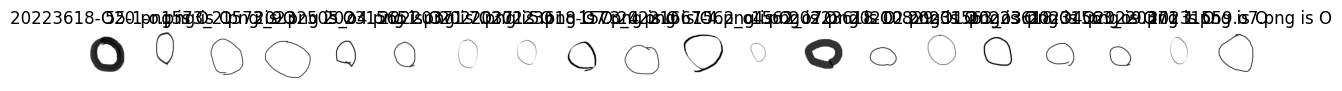

1/1 [==============================] - 0s 30ms/step
1 20 1
1/1 [==============================] - 0s 28ms/step
1 20 2
1/1 [==============================] - 0s 32ms/step
1 20 3
1/1 [==============================] - 0s 28ms/step
1 20 4
1/1 [==============================] - 0s 33ms/step
1 20 5
1/1 [==============================] - 0s 31ms/step
1 20 6
1/1 [==============================] - 0s 28ms/step
1 20 7
1/1 [==============================] - 0s 30ms/step
1 20 8
1/1 [==============================] - 0s 32ms/step
1 20 9
1/1 [==============================] - 0s 30ms/step
1 20 10
1/1 [==============================] - 0s 31ms/step
1 20 11
1/1 [==============================] - 0s 27ms/step
1 20 12
1/1 [==============================] - 0s 29ms/step
1 20 13
1/1 [==============================] - 0s 32ms/step
1 20 14
1/1 [==============================] - 0s 31ms/step
1 20 15
1/1 [==============================] - 0s 31ms/step
1 20 16
1/1 [==============================] - 0s 30ms/st

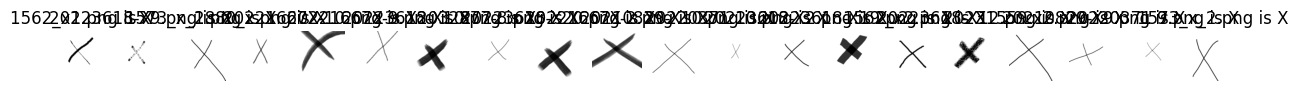

In [42]:
# 이제 테스트 이미지 분류
import numpy as np
from keras.preprocessing import image

# 테스트용 O 이미지 경로 설정
test_dir = './OX_images/test/'
test_o_dir = os.path.join(test_dir, 'O/')
test_o_filenames = os.listdir(test_o_dir)
test_o_filenames

# 테스트용 X 이미지 경로 설정
test_dir = './OX_images/test/'
test_x_dir = os.path.join(test_dir, 'X/')
test_x_filenames = os.listdir(test_x_dir)
test_x_filenames

# O,X를 key로, 이미지 파일 이름들을 value로 dictionary 생성
dic_ox_filenames = {}
dic_ox_filenames['O'] = test_o_filenames
dic_ox_filenames['X'] = test_x_filenames

# O/X 분류 테스트
for ox, filenames in dic_ox_filenames.items():
    fig = plt.figure(figsize=(16,20))
    rows, cols = 1, 20
    for i, fn in enumerate(filenames):
        path = test_dir + ox + '/' + fn
        test_img = image.load_img(path, color_mode='grayscale', target_size=(150, 150), interpolation='bilinear')
        x = image.img_to_array(test_img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])

        classes = model.predict(images, batch_size=10)
        print(rows, cols, i+1)
        fig.add_subplot(rows, cols+1, i+1)
        if classes[0]==0:
            plt.title(fn + " is O")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')
        else:
            plt.title(fn + " is X")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')
    plt.show();

In [43]:
model.save('ox_class_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
